In [36]:
import pandas as pd
df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [37]:
df=df.drop_duplicates()
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [3]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [4]:
df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [20]:
df.replace('American Football / Baseball', 'American Football', inplace=True)

In [21]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
replace_matches_in_column(df=df, column='Sport', string_to_match="soccer")
replace_matches_in_column(df=df, column='Sport', string_to_match="tennis")
replace_matches_in_column(df=df, column='Sport', string_to_match="hockey")
replace_matches_in_column(df=df, column='Sport', string_to_match="basketball")
replace_matches_in_column(df=df, column='Sport', string_to_match="auto racing")
replace_matches_in_column(df=df, column='Sport', string_to_match="boxing")
replace_matches_in_column(df=df, column='Sport', string_to_match="baseball")
replace_matches_in_column(df=df, column='Sport', string_to_match="golf")

df.replace('ice hockey', 'hockey', inplace=True)
df.replace('Ice Hockey', 'hockey', inplace=True)
df.replace('ice hockey', 'hockey', inplace=True)
df.replace('Auto Racing (Nascar)', 'auto racing', inplace=True)
df.replace('F1 Motorsports', 'auto racing', inplace=True)
df.replace('NBA', 'basketball', inplace=True)
df.replace('NASCAR', 'auto racing', inplace=True)
df.replace('F1 racing', 'auto racing', inplace=True)
df.replace('motorcycle gp', 'auto racing', inplace=True)
df.replace('NFL', 'American Football', inplace=True)

sports = df['Sport'].unique()

print(f"There are {len(sports)} unique sports")
sports

There are 11 unique sports


array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis',
       'American Football', 'baseball', 'hockey', 'soccer', 'cycling',
       'MMA'], dtype=object)

In [22]:
df.Nationality.value_counts()#no of sportsmen per country

USA                 206
UK                   13
Germany              13
Switzerland          12
Portugal             10
Brazil                9
Argentina             9
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Russia                1
Australia             1
Dominican             1
Austria               1
Filipino              1
Spain                 1
Serbia                1
Northern Ireland      1
Ireland               1
Mexico                1
Name: Nationality, dtype: int64

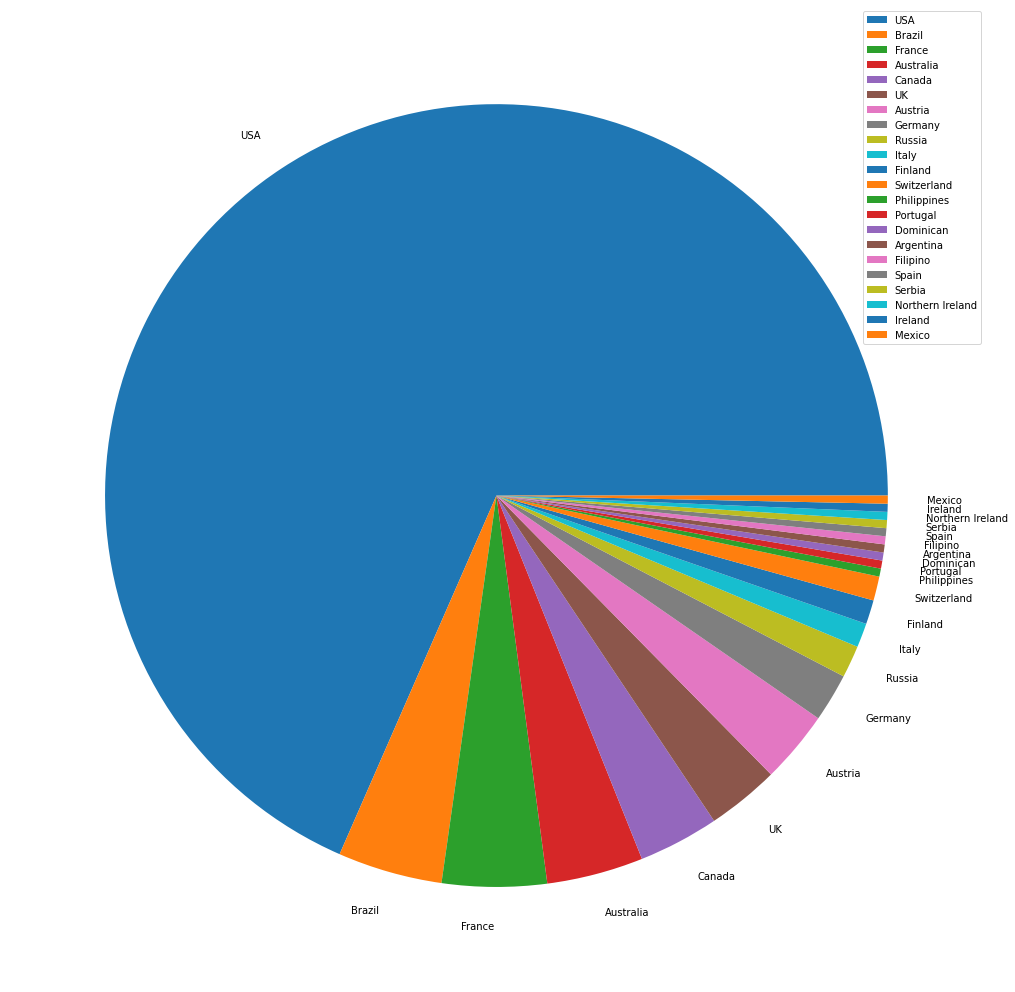

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
plt.pie(df.Nationality.value_counts(), labels=df.Nationality.unique()) #labels are the unique values for countries
plt.legend()
plt.show()

In [24]:
df.Sport.value_counts()

basketball           82
boxing               46
golf                 44
auto racing          40
soccer               34
tennis               23
American Football    20
baseball              6
hockey                4
cycling               1
MMA                   1
Name: Sport, dtype: int64

In [26]:
df.groupby('Sport')['earnings ($ million)'].mean().sort_values(ascending=False)

Sport
MMA                  99.000000
soccer               66.058824
boxing               49.973913
golf                 48.556818
American Football    46.935000
tennis               44.230435
basketball           41.869512
auto racing          32.025000
cycling              28.000000
baseball             24.350000
hockey               18.925000
Name: earnings ($ million), dtype: float64

[Text(0.5, 1.0, 'Earnings by sport')]

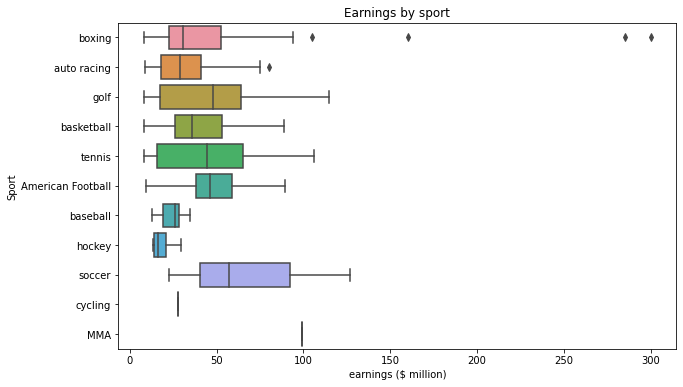

In [27]:
import seaborn as sns
fig = plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, y = 'Sport', x = "earnings ($ million)") #y is used for grouping
ax.set(title = "Earnings by sport")

In [28]:
df.Name.value_counts()#how many times each  was listed

Tiger Woods           19
Michael Jordan        19
Kobe Bryant           14
LeBron James          13
Michael Schumacher    13
                      ..
Tom Brady              1
Michael Moorer         1
Dale Earnhardt Jr.     1
Greg Norman            1
Carson Wentz           1
Name: Name, Length: 82, dtype: int64

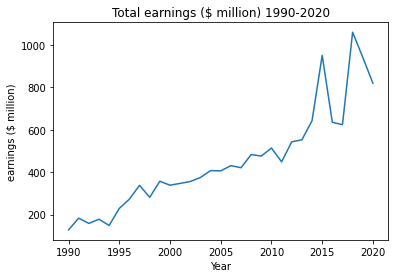

In [29]:
earnings_year = df.groupby('Year')['earnings ($ million)'].sum() #earnings grouped by year then sum for each group

plt.xlabel('Year')
plt.ylabel('earnings ($ million)')
plt.title('Total earnings ($ million) 1990-2020')
plt.plot(earnings_year)

In [31]:
df.groupby(by ='Name')['earnings ($ million)'].sum().sort_values(ascending = False).head(10) #earnings grouped by name then sum taken for each group, head shows the first 10 entries

Name
Tiger Woods           1373.8
LeBron James           844.8
Floyd Mayweather       840.0
Cristiano Ronaldo      787.1
Roger Federer          781.1
Michael Jordan         738.8
Lionel Messi           715.5
Michael Schumacher     639.0
Kobe Bryant            601.1
Phil Mickelson         519.9
Name: earnings ($ million), dtype: float64

<AxesSubplot: xlabel='Name'>

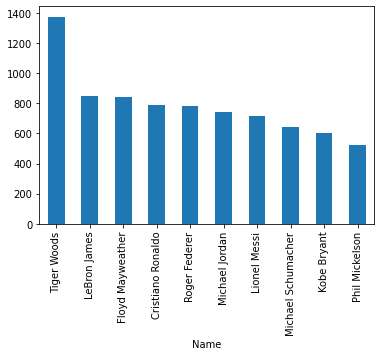

In [32]:
(df.groupby(by ='Name')['earnings ($ million)'].sum().sort_values(ascending = False).head(10)).plot.bar(x="Name", y="Total earnings 1990-2020")

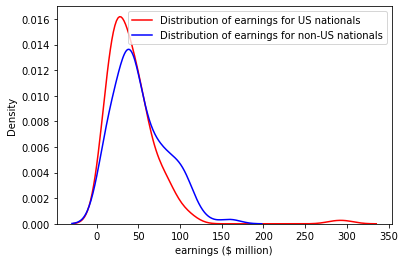

In [33]:
#density plot US earnings versus rest of the world
df[df['Nationality'] == 'USA']['earnings ($ million)'].sum() #select rows only with condition on column then sum earnings from the row
df[df['Nationality'] != 'USA']['earnings ($ million)'].sum()
sns.kdeplot(df[df['Nationality'] == 'USA']['earnings ($ million)'], color="r", label='Distribution of earnings for US nationals')
sns.kdeplot(df[df['Nationality'] != 'USA']['earnings ($ million)'], color="b", label='Distribution of earnings for non-US nationals')
plt.xlabel("earnings ($ million)")
plt.ylabel("Density")
plt.legend()
plt.show()

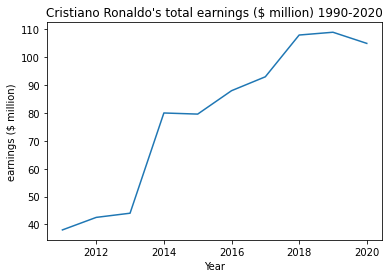

In [34]:
temp=df[df['Name'] == 'Cristiano Ronaldo'].groupby('Year')['earnings ($ million)'].sum() #select rows that contain Cristiano Ronaldo, group them by year then sum earnings for each group
plt.xlabel('Year')
plt.ylabel('earnings ($ million)')
plt.title("Cristiano Ronaldo's total earnings ($ million) 1990-2020")
plt.plot(temp)